<a href="https://colab.research.google.com/github/ashamril/Text-Analytics/blob/master/Vader_EN_Twitter_Sentiment_Analysis_on_any_keyword_here_in_Malaysia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#English Twitter Sentiment Analysis on any_keyword_here in Malaysia
**Sentiment Analysis**, or **Opinion Mining**, is a sub-field of **Natural Language Processing (NLP)** that tries to identify and extract opinions within a given text. The aim of sentiment analysis is to gauge the attitude, sentiments, evaluations, attitudes and emotions of a speaker/writer based on the computational treatment of subjectivity in a text.

**NLTK**, is a suite of libraries and programs for symbolic and statistical natural language processing for English, written in the Python programming language.
https://www.nltk.org/

Tweets are collected using **GetOldTweets3**. GetOldTweets3 has no limitation regarding the amount of the retrieved tweets.

In [ ]:
%pip install GetOldTweets3

In [ ]:
%pip install googletrans

     |████████████████████████████████| 61kB 2.1MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 942kB 9.1MB/s 
     |████████████████████████████████| 61kB 7.5MB/s 
     |████████████████████████████████| 71kB 8.1MB/s 
     |████████████████████████████████| 102kB 10.8MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=9fa509918f43d788cb56829cc236b3af9bb395a128ff9b2dcd805358868d9581
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=0abb74943da491013d07c07a5b6433643c730a95fdcdb244bc2439a69146f1de
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import GetOldTweets3 as got
import warnings
from googletrans import Translator

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Change accordingly
keyword = "mco OR pkp" # use OR or AND respectively, eg. mco OR pkp
location = "Kuala Lumpur, Malaysia"
start_date = "2020-08-01"    # yyyy-mm-dd
#latest_date = "2020-07-25"
number_tweets = 1000
lang = "en"

In [ ]:
# search_tweet = got.manager.TweetCriteria().setQuerySearch(keyword)\
#                                             .setNear(location)\
#                                             .setSince(start_date)\
#                                             .setUntil(latest_date)\
#                                             .setMaxTweets(number_tweets)

In [ ]:
# Search tweets using keyword, location, start_date and English language only
search_tweet = got.manager.TweetCriteria().setQuerySearch(keyword)\
                                             .setNear(location)\
                                             .setSince(start_date)\
                                             .setMaxTweets(number_tweets)\
                                             .setLang(lang)

tweet_df = pd.DataFrame({'got_criteria':got.manager.TweetManager.getTweets(search_tweet)})

In [ ]:
print("Number of tweets collected: ")
len(tweet_df)

Number of tweets collected: 


264

In [ ]:
def get_twitter_info():
    tweet_df["username"] = tweet_df["got_criteria"].apply(lambda x: x.username)
    tweet_df["tweet_text"] = tweet_df["got_criteria"].apply(lambda x: x.text)
    tweet_df["date"] = tweet_df["got_criteria"].apply(lambda x: x.date)
    tweet_df["hashtags"] = tweet_df["got_criteria"].apply(lambda x: x.hashtags)
    tweet_df["link"] = tweet_df["got_criteria"].apply(lambda x: x.permalink)

In [ ]:
pd.options.display.max_columns = None
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', 1000)
get_twitter_info()
df = tweet_df.drop(["got_criteria"], axis=1)
df

,username,tweet_text,date,hashtags,link
0,im_nayli,"Oh how I miss you in our old conversation, I guess pkp does change people",2020-08-19 12:33:51+00:00,,https://twitter.com/im_nayli/status/1296062824674820097
1,_Mysrh_00,Rindu confident before pkp,2020-08-19 12:27:57+00:00,,https://twitter.com/_Mysrh_00/status/1296061340264484864
2,hanumhizan,"Salam and hello I’m Hanum, a vet student from UPM. I’m currently doing my final project with the tittle attached. Basically, I’m trying to find out the differences of expenditure on cat food before MCO and during MCO in Selangor",2020-08-19 11:34:38+00:00,,https://twitter.com/hanumhizan/status/1296047920932765697
3,Inbarajs,"I was already losing it 6 days into the MCO, but it was great that my kids' school implemented e-learning. Initially it was taking too much of my time but managed to convince them to go on Zoom. I survived this MCO with my sanity partially intact.",2020-08-19 10:05:42+00:00,,https://twitter.com/Inbarajs/status/1296025541867261952
4,tim_melodicpunk,my everyday workspace #sop #mco #pandemic,2020-08-19 10:02:32+00:00,#sop #mco #pandemic,https://twitter.com/tim_melodicpunk/status/1296024744412581888
...,...,...,...,...,...
259,neesasodirman,Lama betul tak jumpa model friends sebab MCO. And also no modeling jobs much because of MCO also so memang nak encounter model friends susah sket. Everyone ada life masing masing kan.,2020-08-02 08:04:37+00:00,,https://twitter.com/neesasodirman/status/1289834475744948226
260,lim_wiz,1st badminton after MCO. YEAH @222 Sports centre - PJ https://www.instagram.com/p/CDXtr33nKyq/?igshid=dvb6tr5spk71,2020-08-02 02:41:25+00:00,,https://twitter.com/lim_wiz/status/1289753140774998017
261,shazwan_r,Went there last time before pkp. Such a nice place to stay.,2020-08-01 23:32:42+00:00,,https://twitter.com/shazwan_r/status/1289705645063585794
262,dannyhschen,"After MCO, Village Park Expanded to 3 shop lots. Glad to see business still flourishing. #train2eat #eatsingtravel #klfoodie #nasilemak #villageparknasilemak @Village Park Restaurant https://www.instagram.com/p/CDVrG_2FF76/?igshid=1px3aeyixguk8",2020-08-01 07:40:26+00:00,#train2eat #eatsingtravel #klfoodie #nasilemak #villageparknasilemak,https://twitter.com/dannyhschen/status/1289466002275815424


In [ ]:
corpus = df["tweet_text"]
corpus_list = corpus.tolist()

In [ ]:
#  Language detection
data = []
for i in corpus_list: 
  t = Translator().detect(i)
  data.append([t.lang, t.confidence, i])
  
detection_df = pd.DataFrame(data)
print(detection_df)

      0         1                                                                                                                                                                                                                                                         2
0    en  1.000000                                                                                                                                                                                Oh how I miss you in our old conversation, I guess pkp does change people 
1    en  1.000000                                                                                                                                                                                                                                Rindu confident before pkp
2    en  1.000000                     Salam and hello I’m Hanum, a vet student from UPM. I’m currently doing my final project with the tittle attached. Basically, I’m trying to find out the differ

In [ ]:
  detection_df.columns = ['Lang','Confidence','Text']
  s = detection_df.Lang
  counts = s.value_counts()
  percent100 = s.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
  detection_df2 = pd.DataFrame({'Counts': counts, 'Percentage': percent100})
  detection_df2.head(10)

,Counts,Percentage
en,255,96.59%
ms,4,1.52%
id,1,0.38%
msid,1,0.38%
enms,1,0.38%
msen,1,0.38%
idms,1,0.38%


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


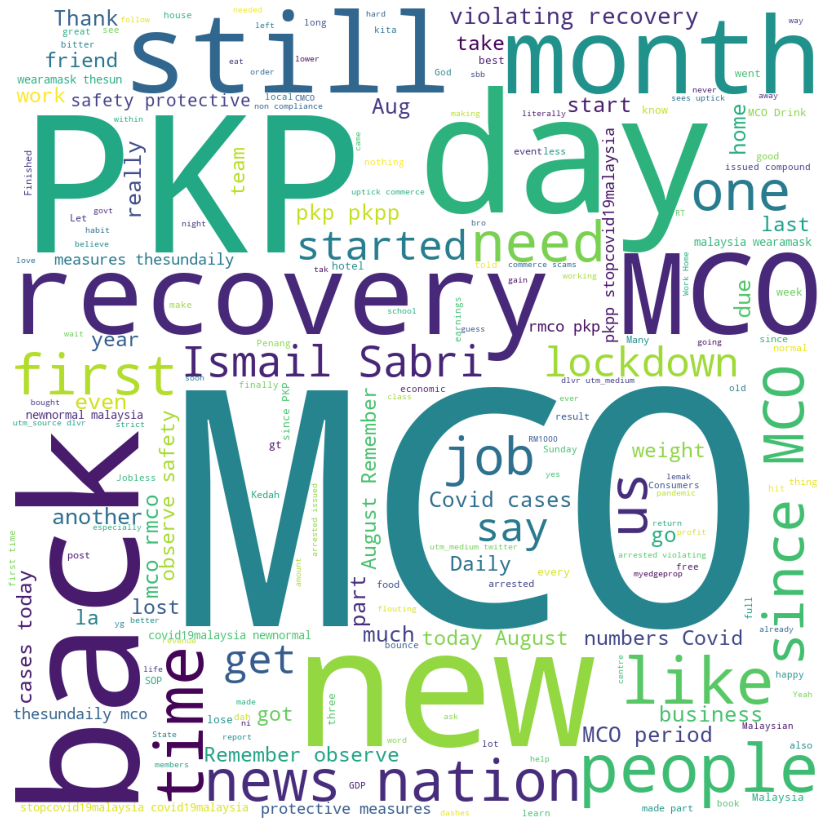

In [ ]:
# Word cloud
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS 

stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['igshid', 'http', 'https', 'www', 'instagram', 'amp', 'com', 'ly', 'ow', 'id', 'i\'m', 'cryptocom', 'cro', 'co', 'crypto', 'thestar']
stopwords.extend(newStopWords)
#stopwords = newStopWords
#stopwords = set(STOPWORDS)


unique_string=(" ").join(corpus_list)
wordcloud = WordCloud(width = 1000, height = 1000, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(unique_string)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.
# VADER uses a combination of a sentiment lexicon is a list of lexical features (e.g., words) which are generally labelled according to their semantic orientation as either positive or negative.
# https://github.com/cjhutto/vaderSentiment

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
model = SentimentIntensityAnalyzer()

In [ ]:
# Pie Chart
def cls_corpus_pie(corpus_list):
  data=[]
  for sentence in corpus_list: 
    corpus_result = model.polarity_scores(sentence)
    # Decide whether the text is positive, negative or neutral 
    if corpus_result['compound'] >= 0.05 : 
      cls = "Positive"
    elif corpus_result['compound'] <= -0.05 : 
      cls = "Negative" 
    else : 
      cls = "Neutral" 
    data.append([corpus_result, cls, sentence])
    df = pd.DataFrame(data)

  df2 = pd.DataFrame(df[0].values.tolist(), index=df.index)
  df2.columns=['Negative', 'Neutral', 'Positive', 'Compound']

  df2['Classification'] = df[1]
  df2['Text'] = df[2]
  class_count  = df2['Classification'].value_counts().sort_index()
  plt.figure(figsize=(20,9))
  s = df2.Classification
  counts = s.value_counts()
  percent100 = s.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
  df3 = pd.DataFrame({'Counts': counts, 'Percentage': percent100}).sort_index(ascending=False)
  
  #pd.options.display.max_columns = None
  #pd.set_option('display.expand_frame_repr', False)
  print(df2)
  print("")
  print("Total Number of Tweets: ", df2['Classification'].count())
  print("")
  print(df3)
  print("")
  colors=['green', 'yellow', 'red']
  explode = (0.07, 0, 0)
  df3.Counts.plot(kind='pie', explode=explode, colors=colors, autopct='%1.2f%%', shadow=True, startangle=50, fontsize=15)
  plt.title("EN Twitter Sentiment Analysis on {} in Malaysia".format(keyword), fontweight='bold', fontsize=15, bbox={'facecolor':'0.8', 'pad':5})
  plt.xlabel('Percentage Distribution of the Sentiments', fontweight='bold', fontsize=15)
  plt.ylabel('')
  plt.show()

     Negative  Neutral  Positive  Compound Classification                                                                                                                                                                                                                                                      Text
0       0.118    0.882     0.000   -0.1531       Negative                                                                                                                                                                                Oh how I miss you in our old conversation, I guess pkp does change people 
1       0.000    0.484     0.516    0.4939       Positive                                                                                                                                                                                                                                Rindu confident before pkp
2       0.000    1.000     0.000    0.0000        Neutral                   

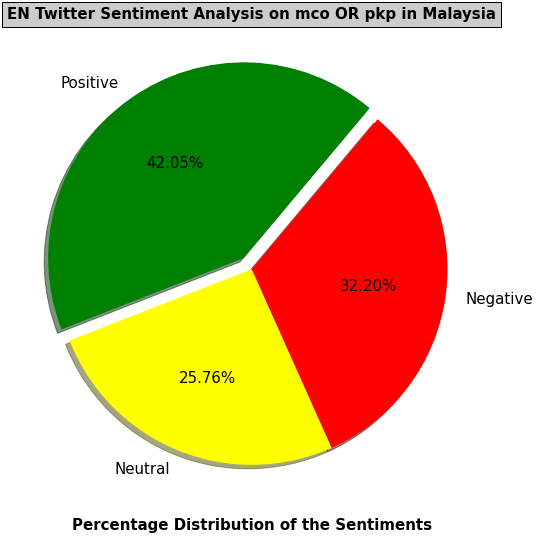

In [ ]:
cls_corpus_pie(corpus_list)

In [ ]:
# Bar Chart
def cls_corpus(corpus_list):
  data=[]
  for sentence in corpus_list: 
    corpus_result = model.polarity_scores(sentence)
    # Decide whether the text is positive, negative or neutral 
    if corpus_result['compound'] >= 0.05 : 
      cls = "Positive"
    elif corpus_result['compound'] <= -0.05 : 
      cls = "Negative" 
    else : 
      cls = "Neutral" 
    data.append([corpus_result, cls, sentence])
    df = pd.DataFrame(data)

  df2 = pd.DataFrame(df[0].values.tolist(), index=df.index)
  df2.columns=['Negative', 'Neutral', 'Positive', 'Compound']

  df2['Classification'] = df[1]
  df2['Text'] = df[2]
  class_count  = df2['Classification'].value_counts().sort_index()
  plt.figure(figsize=(20,9))
  #sns.barplot(class_count.index, class_count.values, alpha=0.8)
  ax = class_count.plot.bar(color=['red', 'yellow', 'green'], figsize=(20, 9))
  plt.xticks(rotation=0)
  plt.title("Twitter Sentiment Analysis on {} in Malaysia".format(keyword), fontweight='bold', fontsize=15)
  plt.ylabel('Number of Sentiments', fontweight='bold', fontsize=15)
  plt.xlabel('Classification', fontweight='bold', fontsize=15)
  plt.grid(True)

  s = df2.Classification
  counts = s.value_counts()
  percent100 = s.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
  df3 = pd.DataFrame({'Counts': counts, 'Percentage': percent100})
  
  i = 0
  #label = np.round(class_count.values, 2)
  label = df3.Percentage
  for p in ax.patches:
      ax.annotate(str(round(p.get_height(),2 )), (p.get_x() * 1.005, p.get_height() * 1.01), fontweight='bold', fontsize=15)
      i = i+1

  #pd.options.display.max_columns = None
  #pd.set_option('display.expand_frame_repr', False)
  print(df2)
  print("")
  print("Total Number of Tweets: ", df2['Classification'].count())
  print("")
  print(df3)
  print("")
  plt.show()

     Negative  Neutral  Positive  Compound Classification                                                                                                                                                                                                                                                      Text
0       0.118    0.882     0.000   -0.1531       Negative                                                                                                                                                                                Oh how I miss you in our old conversation, I guess pkp does change people 
1       0.000    0.484     0.516    0.4939       Positive                                                                                                                                                                                                                                Rindu confident before pkp
2       0.000    1.000     0.000    0.0000        Neutral                   

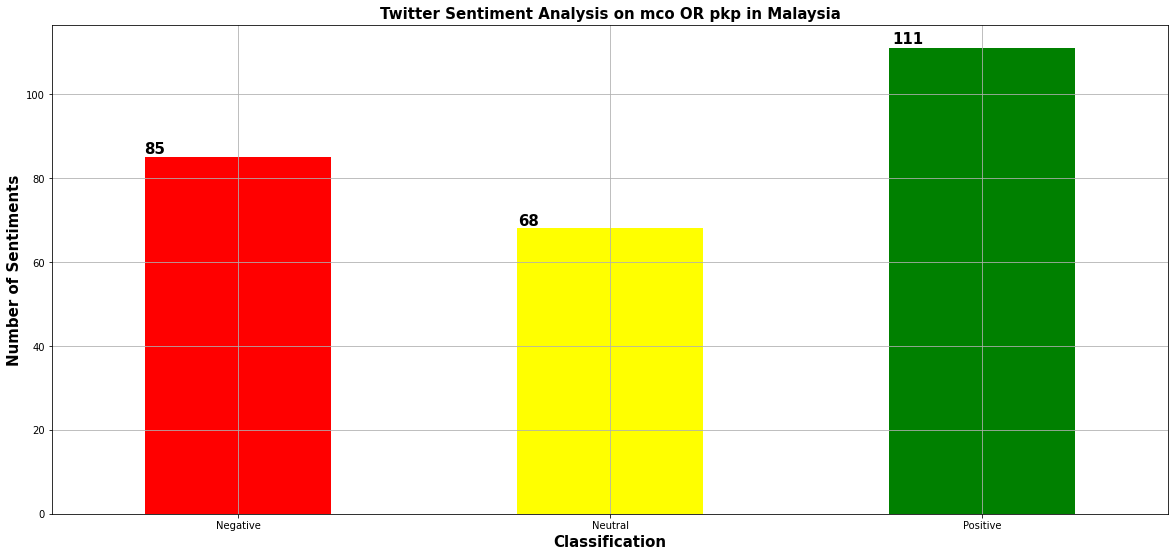

In [ ]:
cls_corpus(corpus_list)